<a href="https://colab.research.google.com/github/royam0820/Notebooks/blob/master/fastai_v3_cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Images Classifier

We are going to classify dogs v.s. cats. Using the cnn architecture resnet34. 

We have two datasets: 
- a training set (/data/train)
- a validation set (/data/valid)

## Importing the fastai libraries


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Creating the dataset

### Getting a list of urls

#### Search and Scroll
Go to [Google Images](https://www.google.com/imghp?hl=en&tab=wi&authuser=0) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, ``"canis lupus lupus"``, it might be a good idea to exclude other variants:

``"canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis``

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Downloading images urls into file
Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press CtrlShiftJ in Windows/Linux and CmdOptJ in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

 `urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));``

In [0]:
# deleting a directory with files
!rm -r data

## Create directories and upload images from urls
The directories created will be stored in the main directory: "./content/data".


We are creating under the data directory, the subdirectory: "cats" and "dog"

And the urls files are stored in the data directory. (urls_cats.txt and urls_dogs.txt)

### Creating the train dataset

In [0]:
folder = 'dogs'
file = 'urls_dogs.txt'

In [0]:
# Creating the directory and downloading images for folder dogs
path = Path('data/train')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

NOTE: Add the file **urls_dogs.txt** in the **data/train** directory and then load the files form the picture urls stored in it.



In [0]:
classes = ['cats', 'dogs']

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'cats'
file = 'urls_cats.txt'

In [0]:
# Creating the directory and downloading images for folder cats
path = Path('data/train')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

NOTE: Add the file **urls_cats.txt** in the **data/train** directory and then load the files form the picture urls stored in it.

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
path.ls()

### Creating the validation dataset

In [0]:
folder = 'dogs'
file = 'valid_urls_dogs.txt'

In [0]:
# Creating the directory and downloading images for folder dogs
path = Path('data/valid')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

NOTE: Add the file **valid_urls_dogs.txt** in the **data/valid** directory and then load the files form the picture urls stored in it.

In [0]:
classes = ['cats','dogs']

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'cats'
file = 'valid_urls_cats.txt'

In [0]:
# Creating the directory and downloading images for folder cats
path = Path('data/valid')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

NOTE: Add the file **valid_urls_cats.txt** in the **data/valid**
directory and then load the files form the picture urls stored in it.

In [0]:
download_images(path/file, dest, max_pics=200)

## Remove all images that can’t be opened

In [0]:
classes = ['cats','dogs']
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

## Import Data


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

ImageDataBunch.from_folder is going to return a DataBunch object. In fastai, everything you model with is going to be a DataBunch object. Basically DataBunch object contains 2 or 3 datasets - it contains your training data, validation data, and optionally test data. For each of those, it contains your images and your labels, your texts and your labels, or your tabular data and your labels, or so forth. And that all sits there in this one place(i.e. data).

Something we will learn more about in a little bit is normalization. But generally in nearly all machine learning tasks, you have to make all of your data about the same "size" - they are specifically about the same mean and standard deviation. So there is a normalize function that we can use to normalize our data bunch in that way.``

In [167]:
data.classes

['cats', 'dogs']

### Examining the data

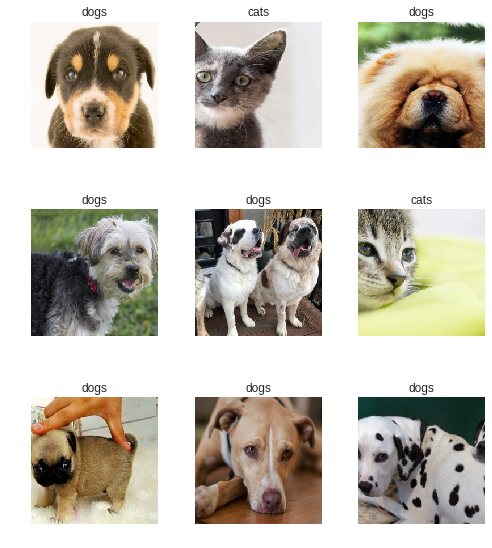

In [168]:
data.show_batch(rows=3, figsize=(7,8))


## Train the Model
Believe it or not, we are now ready to train a model. A model is trained in fastai using something called a "learner".

DataBunch: A general fastai concept for your data, and from there, there are subclasses for particular applications like ImageDataBunch
Learner: A general concept for things that can learn to fit a model. From that, there are various subclasses to make things easier in particular, there is a convnet learner (something that will create a convolutional neural network for you).

In [169]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 111336987.82it/s]


In [170]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.707399,0.258262,0.148649
2,0.430406,0.178152,0.081081
3,0.299075,0.094759,0.040541
4,0.255202,0.082996,0.027027


We just trained a model. We don't know exactly what that involved or how it happened but we do know that with 3 or 4 lines of code, we've built something which smashed the accuracy of the state-of-the-art of 2012. 6% error certainly sounds like pretty impressive for something that can recognize different dog breeds and cat breeds, but we don't really know why it work, but we will. That's okay.

We've got this trained model and what's actually happened as we'll learn is it's basically creating a set of weights. If you've ever done anything like a linear regression or logistic regression, you'll be familiar with coefficients. We basically found some coefficients and parameters that work pretty well and it took us a minute and 56 seconds. So if we want to start doing some more playing around and come back later, we probably should save those weights. You can just go learn.save and give it a name. It's going to put it in a model subdirectory in the same place the data came from, so if you save different models or different data bunches from different datasets, they'll all be kept separate. So don't worry about it.



In [0]:
# saving the model weights
learn.save('stage-1')

## Results
To see what comes out, we could use this class for class interpretation. We are going to use this factory method from learner, so we pass in a learn object. Remember a learn object knows two things:

- What's your data
- What is your model. Now it's not just an architecture, it's actually a trained model
That's all the information we need to interpret that model.

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

One of the things, perhaps the most useful things to do is called plot_top_losses. We are going to be learning a lot about this idea of loss functions shortly but in short, a loss function is something that tells you how good was your prediction. Specifically that means if you predicted one class of cat with great confidence, but actually you were wrong, then that's going to have a high loss because you were very confident about the wrong answer. So that's what it basically means to have high loss. By plotting the top losses, we are going to find out what were the things that we were the most wrong on, or the most confident about what we got wrong.

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

It prints out four things. What do they mean? Perhaps we should look at the document.

We have already seen help, and help just prints out a quick little summary. But if you want to really see how to do something use doc.

In [0]:
# the confusion matrix
interp.plot_confusion_matrix()

In [0]:
# getting the most-confused values
interp.most_confused(min_val=2)

most_confused will simply grab out of the confusion matrix the particular combinations of predicted and actual that got wrong the most often.

## Fine-tuning the model
Let's make our model better. How? We can make it better by using fine-tuning. So far we fitted 4 epochs and it ran pretty quickly. The reason it ran pretty quickly is that there was a little trick we used. These convolutional networks, they have many layers. We'll learn a lot about exactly what layers are, but for now, just know it goes through a lot of computations. What we did was we added a few extra layers to the end and we only trained those. We basically left most of the model exactly as it was, so that's really fast. If we are trying to build a model at something that's similar to the original pre-trained model (in this case, similar to the ImageNet data), that works pretty well.

But what we really want to do is to go back and train the whole model. This is why we pretty much always use this two stage process. By default, when we call fit or fit_one_cycle on a ConvLearner, it'll just fine-tune these few extra layers added to the end and it will run very fast. It will basically never overfit but to really get it good, you have to call unfreeze. unfreeze is the thing that says please train the whole model. Then I can call fit_one_cycle again.

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

Uh-oh. The error got much worse. Why? In order to understand why, we are actually going to have to learn more about exactly what's going on behind the scenes. So let's start out by trying to get an intuitive understanding of what's going on behind the scenes. We are going to do it by looking at pictures.

Let's reload our save weights.

In [0]:
learn.load('stage-1')

### Learning rate finder
Let's run learning rate finder. We are learning about what that is next week, but for now, just know this is the thing that figures out what is the fastest I can train this neural network at without making it zip off the rails and get blown apart.

In [173]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


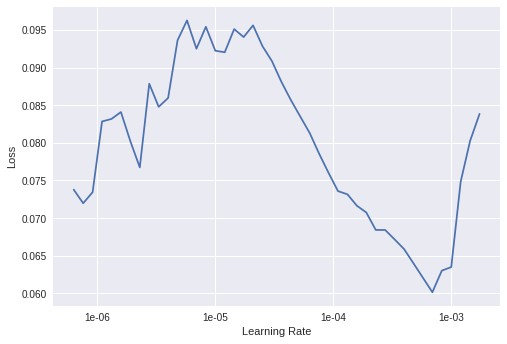

In [174]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

You use this keyword in Python called slice and that can take a start value and a stop value and basically what this says is train the very first layers at a learning rate of 1e-6, and the very last layers at a rate of 1e-4, and distribute all the other layers across that (i.e. between those two values equally).

In [0]:
learn.save('stage-2')

### Interpretation

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

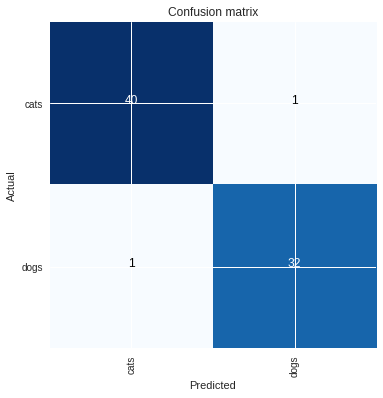

In [178]:
interp.plot_confusion_matrix()

## Clean up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the ImageCleaner widget from fastai.widgets we can prune our top losses, removing photos that don't belong.

In [0]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with .from_toplosses. We then feed the top losses indexes and corresponding dataset to ImageCleaner.

Notice that the widget will not delete images directly from disk but it will create a new csv file cleaned.csv from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [0]:
#ImageCleaner(ds, idxs)
ImageCleaner(ds, idxs, path) 

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. ImageCleaner will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from top_losses.ImageCleaner(ds, idxs)

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.